# Data Cleaning

In [90]:
import numpy as np
import pandas as pd
from obspy import read
import os
import matplotlib.pyplot as plt
import plotly.express as px
from geopy import distance

In [91]:
# cleaning and putting all the seismic data into a DataFrame
# .BH is removed (they are duplicate sensors)
directory = "./sw4_test_output/"
file_list = os.listdir(directory)
file_list.sort()
file_list = [x for x in file_list if "sw4img" not in x and ".dat" not in x and "BH" not in x]
assert((len(file_list) / 3) - int(len(file_list) / 3) == 0)
df = pd.DataFrame(data=file_list)
df.columns = ['Point']
# station location data
locations = pd.read_csv('sw4_station.txt', delimiter = ",")

peak:  0.000223098
duration:  [7.1966845191343225, 45.064055941804448]


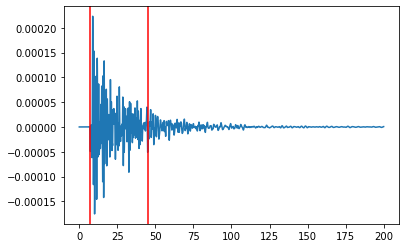

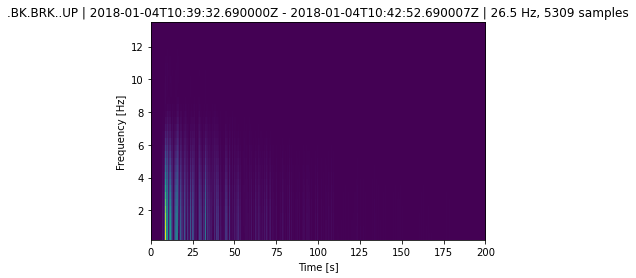

In [102]:
# peak and duration data for each point
absolute_peaks = []
durations = []
amplitudes = []
times = []
for i in range(len(file_list)):
    st = read(directory+file_list[i])
    tr = st[0]
    # tr.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    abs_data = abs(tr.data)
    time = tr.times()
    start = np.argmax(abs_data>0.00004)
    data_flipped = np.flip(abs_data)
    end = len(abs_data) - np.argmax(data_flipped>0.00004) - 1
    duration = time[end-1] - time[start]
    absolute_peaks.append(abs(max(tr.data, key=abs)))
    durations.append(duration)
    amplitudes.append(tr.data)
    times.append(tr.times())
    
    # test single point
    # set name of data point to name
    name = "BK.BRK.HN.u"
    if file_list[i] == name:
        print('peak: ', abs(max(tr.data, key=abs)))
        print('duration: ', [time[start], time[end]])
        plt.plot(time, tr.data)
        plt.axvline(x=time[start], color='r')
        plt.axvline(x=time[end], color='r')
        tr.spectrogram()        

In [39]:
# full dataframe
df["Station"] = [x[:-5] for x in df["Point"]]
df["Amplitudes"] = amplitudes
df["Times"] = times
df["Absolute Peak"] = absolute_peaks
df["Duration"] = durations
df_with_locations = pd.merge(df, locations, left_on='Station', right_on='net.sta')
df_with_locations = df_with_locations.drop(columns=['net.sta'])
source = (37.86119, -122.24233)
df_with_locations['Distance (miles)'] = df_with_locations.apply(lambda row: distance.distance((row.lat, row.lon), source).miles, axis=1)
df_with_locations

,Point,Station,Amplitudes,Times,Absolute Peak,Duration,lat,lon,Distance (miles)
0,BK.BDM.HN.e,BK.BDM,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000380,54.107010,37.953970,-121.86554,21.561090
1,BK.BDM.HN.n,BK.BDM,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000315,53.202715,37.953970,-121.86554,21.561090
2,BK.BDM.HN.u,BK.BDM,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000358,54.446121,37.953970,-121.86554,21.561090
3,BK.BKS.HN.e,BK.BKS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.001960,86.887720,37.876220,-122.23558,1.100331
4,BK.BKS.HN.n,BK.BKS,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.001214,76.526001,37.876220,-122.23558,1.100331
...,...,...,...,...,...,...,...,...,...
952,NP.ADS2.HN.n,NP.ADS2,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000211,28.372269,38.774460,-122.69974,67.717936
953,NP.ADS2.HN.u,NP.ADS2,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000110,20.459684,38.774460,-122.69974,67.717936
954,NP.PLA.HN.e,NP.PLA,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000247,42.690280,37.798672,-121.46315,42.840388
955,NP.PLA.HN.n,NP.PLA,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000639,56.066317,37.798672,-121.46315,42.840388


# Visualizing Peaks and Duration for Each Direction

In [9]:
# only .e
east_west = df_with_locations.iloc[::3, :]
# only .n
north_south = df_with_locations.iloc[1::3, :]
# only .u
up_down = df_with_locations.iloc[1::3, :]

In [40]:
ew = px.scatter_mapbox(east_west, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                [(0, "blue"), (0.15, "green"), (0.20, "yellow"), (1, "red")], title="Peak Amplitude at Each Individual Station (East-West)")
ew.update_traces(marker={'size': 8})
ew.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
ew.show()

In [41]:
ns = px.scatter_mapbox(north_south, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                [(0, "blue"), (0.15, "green"), (0.20, "yellow"), (1, "red")], title="Peak Amplitude at Each Individual Station (North-South)")
ns.update_traces(marker={'size': 8})

ns.show()

In [42]:
ud = px.scatter_mapbox(up_down, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                [(0, "blue"), (0.15, "green"), (0.20, "yellow"), (1, "red")], title="Peak Amplitude at Each Individual Station (Up-Down)")
ud.update_traces(marker={'size': 8})

ud.show()

There does not seem to be major differences between each direction, although the east-west peaks seem to be on average higher than the other directions in the San Franciso area.

# Visualizing as 3D Vector Data

BK.BKS.HN
duration:  [7.5357953079940545, 94.951020880725096]


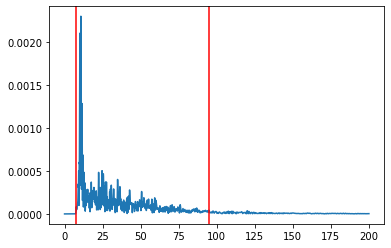

In [43]:
# creating 3D Vector Data
magnitudes = []
durations = []
peaks = []
deltas = []
for i in range(0, len(file_list), 3):
    st = read(directory+file_list[i])
    tr_e = st[0]
    #tr_e.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    x = tr_e.data
    st = read(directory+file_list[i+1])
    tr_n = st[0]
    #tr_n.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    y = tr_n.data
    st = read(directory+file_list[i+2])
    tr_u = st[0]
    #tr_u.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    z = tr_u.data
    mag = np.sqrt(x**2 + y**2 + z**2)
    start = np.argmax(mag>0.00004)
    mag_flipped = np.flip(mag)
    end = len(mag) - np.argmax(mag_flipped>0.00004) - 1
    time = tr_u.times()
    peak = max(mag)
    duration = time[end] - time[start]
    durations.append(duration)
    magnitudes.append(mag)
    peaks.append(peak)
    
    # test single point
    # set name of data point to name
    name = "BK.BKS.HN"
    if file_list[i][:-2] == name:
        print(file_list[i][:-2])
        plt.plot(time, mag)
        plt.axvline(x=time[start], color='r')
        plt.axvline(x=time[end], color='r')
        print('duration: ', [time[start], time[end]])

In [44]:
# new DataFrame for 3D Data
new_points = file_list[::3]
new_points = [x[:-2] for x in new_points]
df_3d = pd.DataFrame(data=new_points)
df_3d.columns = ['Point']
df_3d["Station"] = [x[:-3] for x in df_3d["Point"]]
df_3d["Magnitudes"] = magnitudes
df_3d["Peak"] = peaks
df_3d["Duration"] = durations
df_3d = pd.merge(df_3d, locations, left_on='Station', right_on='net.sta')
df_3d = df_3d.drop(columns=['net.sta'])
df_3d = df_3d.drop_duplicates(subset = ["Station"])

In [45]:
fig1 = px.scatter_mapbox(df_3d, lat='lat', lon='lon', color='Peak', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        [(0, "blue"), (0.25, "green"), (0.4, "yellow"), (1, "red")], 
                         title="Peak Amplitude (Using 3D Vector Data) at Each Individual Station")
fig1.update_traces(marker={'size': 8})
fig1.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig1.show()

In [46]:
fig2 = px.scatter_mapbox(df_3d, lat='lat', lon='lon', color='Duration', mapbox_style='stamen-terrain', hover_name='Station', color_continuous_scale = 
                [(0, "blue"), (0.25, "green"), (0.5, "yellow"), (1, "red")], title="Duration of Earthquake (Using 3D Vector Data) at Each Individual Station")
fig2.update_traces(marker={'size': 8})
fig2.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig2.show()

Peak amplitude definitely shows a trend of decreasing as we move away from the source of the earthquake, duration seem to be determined by the terrain.

# Plotting Peak Amplitude/Duration Vs Distance

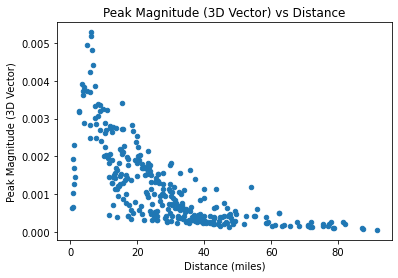

In [104]:
df_3d['Distance (miles)'] = df_3d.apply(lambda row: distance.distance((row.lat, row.lon), source).miles, axis=1)
df_3d.plot(x = 'Distance (miles)', y = 'Peak', kind = 'scatter', ylabel = 'Peak Magnitude (3D Vector)', xlabel = 'Distance (miles)', title = "Peak Magnitude (3D Vector) vs Distance");

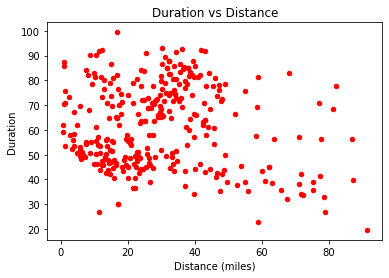

In [52]:
df_3d.plot(x = 'Distance (miles)', y = 'Duration', xlabel = 'Distance (miles)', kind = 'scatter', title = "Duration vs Distance", color="r");

# Comparing Data Points

Here we compare NC.C033 and BK.BRK, because from the peak amplitude geographic plot it seems like BK.BRK is a very small value, even though it is about the same distance (very close) to the source. There could be an error in our computation.

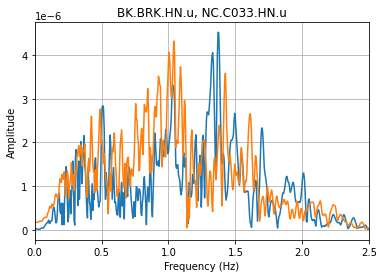

In [94]:
from scipy.fft import fft, ifft, fftfreq
indexed = df_with_locations.set_index('Point')
T = 0.037679 # delta seems to be the same for all points

point1 = 'BK.BRK.HN.u' # Can visualize whatever points you want
data1 = indexed.loc[point1]['Amplitudes']
times1 = indexed.loc[point1]['Times']
# For Fourier Transform, can do other visualizations
N = len(data1)
yf = fft(data1)
xf = fftfreq(N, T)[:N//2]
yf = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf)

point2 = 'NC.C033.HN.u' # Can visualize whatever points you want
data2 = indexed.loc[point2]['Amplitudes']
times2 = indexed.loc[point2]['Times']
N = len(data2)
yf = fft(data2)
xf = fftfreq(N, T)[:N//2]
yf = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf)

plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)");
plt.xlim([0,2.5])
plt.title(point1 + ', ' + point2);

peak_amp_at = np.argmax(yf)
frequency = xf[peak_amp_at]
amp = yf[peak_amp_at]
point = (frequency, amp)

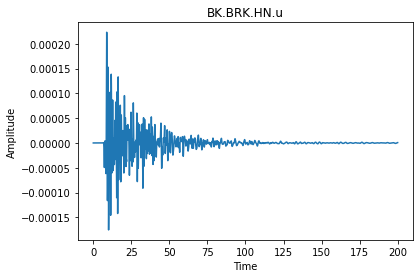

In [101]:
plt.plot(times1, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title(point1);

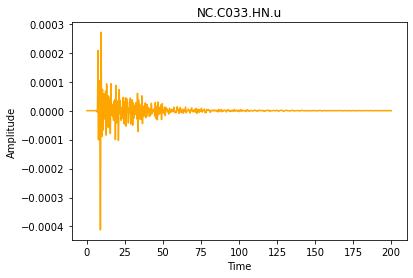

In [100]:
plt.plot(times2, data2, color='orange')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title(point2);

It seems like NC.C033 really does have a higher peak (it is very extreme at the start). BK.BRK actually has relatively low amplitudes despite being so close to the source, which is interesting. We will know if the model is accurate in simulating this once we have the true data.

# Frequency Analysis

In [57]:
frequency_table = []
Corr_Amp = []
for i in df_with_locations.Point:  
    data = indexed.loc[i]['Amplitudes']
    N = len(data)
    yf = fft(data)
    xf = fftfreq(N, T)[:N//2]
    yf = 2.0/N * np.abs(yf[0:N//2])
    peak_amp_at = np.argmax(yf)
    frequency = xf[peak_amp_at]
    amp = yf[peak_amp_at]
    point = (frequency, amp)

    peak_amp_at2 = np.argsort(yf, axis=0)[-2]
    frequency2 = xf[peak_amp_at2]
    amp2 = yf[peak_amp_at2]
    point2 = (frequency2, amp2)

    highest_points = pd.DataFrame([point, point2])
    firstfreq = highest_points.min()[0]
    frequency_table.append(firstfreq)
    amplification = highest_points.min()[1]
    Corr_Amp.append(amplification)
    
    
df_with_locations["Frequency"] = frequency_table 
df_with_locations["Corr_Amp"] = Corr_Amp

df_with_locations_u = df_with_locations[df_with_locations.Point.str.contains('.u')]
df_with_locations_n = df_with_locations[df_with_locations.Point.str.contains('.n')]
df_with_locations_e = df_with_locations[df_with_locations.Point.str.contains('.e')]

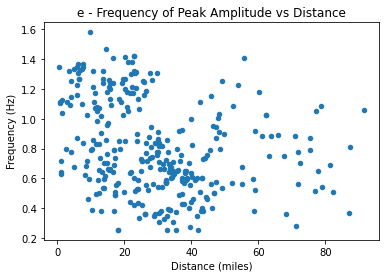

In [71]:
df_with_locations_e.plot(x = 'Distance (miles)', y = 'Frequency', kind = 'scatter', ylabel = 'Frequency (Hz)', xlabel = 'Distance (miles)', title = "e - Frequency of Peak Amplitude vs Distance")
fig_e = px.scatter_mapbox(df_with_locations_e, lat='lat', lon='lon', color='Frequency', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        [(0, "blue"), (0.25, "green"), (0.5, "yellow"), (1, "red")], 
                         title="Frequency Value of Peak Amplitude at Each Individual Station (East-West)")
fig_e.update_traces(marker={'size': 8})
fig_e.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig_e.show();

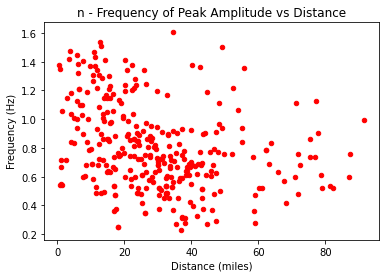

In [70]:
df_with_locations_n.plot(x = 'Distance (miles)', y = 'Frequency', kind = 'scatter', ylabel = 'Frequency (Hz)', xlabel = 'Distance (miles)', title = "n - Frequency of Peak Amplitude vs Distance", color="r")
fig_n = px.scatter_mapbox(df_with_locations_n, lat='lat', lon='lon', color='Frequency', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        [(0, "blue"), (0.25, "green"), (0.5, "yellow"), (1, "red")], 
                         title="Frequency Value of Peak Amplitude at Each Individual Station (North-South)")
fig_n.update_traces(marker={'size': 8})
fig_n.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig_n.show()

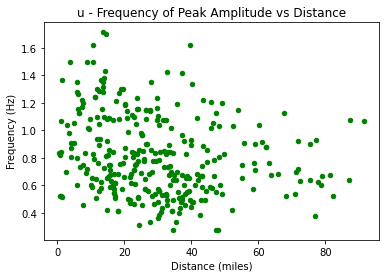

In [73]:
df_with_locations_u.plot(x = 'Distance (miles)', y = 'Frequency', kind = 'scatter', ylabel = 'Frequency (Hz)', xlabel = 'Distance (miles)', title = "u - Frequency of Peak Amplitude vs Distance", color="g")
fig_u = px.scatter_mapbox(df_with_locations_u, lat='lat', lon='lon', color='Frequency', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        [(0, "blue"), (0.25, "green"), (0.5, "yellow"), (1, "red")], 
                         title="Frequency Value of Peak Amplitude at Each Individual Station (Up-Down)")
fig_u.update_traces(marker={'size': 8})
fig_u.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig_u.show()